In [1]:
import matplotlib.pyplot as plt

In [2]:
from collections import namedtuple
import pandas as pd
#pd.style.set_properties(subset=['ad_description'], **{'width-min': '300px'})


fnames = []
KW = ['D', 'X', 'R', 'S', 'M', 'N', 'A', 'B', 'G', 'E', 'V']
Key = namedtuple('Key', KW + ['i'])
keys = []
datasets = ['cifarfs', 'fc100', 'miniimagenet',]# 'miniimagenet84',]# 'tieredimagenet']
for i in [1, ]: #2, 3, ]:
    for D in datasets:
        for M in ['']:
            for N in [0.0, 0.2, 0.4, 0.6]:
                for NT in [N]:
                    for X in [0]:
                        for S in ['00.0']:
                            for R in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
                                for A in [-1, 1]:
                                    B = A
                                    for G in [0]:
                                        for E in [0, 1]:
                                            for V in [0, 1]:
                                                if E == 0:
                                                    if V == 1:
                                                        continue
                                                    if A == 1:
                                                        fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_a{A}_b{B}_g{G}_#{i}.pt55.lam1000.0_nt{NT}.csv')
                                                    else:
                                                        fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_#{i}.pt55.lam1000.0_nt{NT}.csv')
                                                else:
                                                    a = 0 if A == -1 else A
                                                    b = a
                                                    if V==1:
                                                        fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_a{a}_b{b}_g{G}_e{E}_v{V}_#{i}.pt55.lam1000.0_nt{NT}.csv')
                                                    else:
                                                        fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_a{a}_b{b}_g{G}_e{E}_#{i}.pt55.lam1000.0_nt{NT}.csv')

                                                keys.append(Key(D=D, X=X, R=R, S=float(S), A=A, B=B, G=G, M=M, N=N, E=E, V=V, i=i))
 

In [3]:
recs = []
shots = [5]
mets = [
'test_acc', 
# 'test_acc_me1', 
# 'test_acc_me2',
# 'test_acc_me3',
# 'test_acc_me4',
# 'test_acc_me5',
# 'test_acc_me6',
# 'test_acc_me7',
# 'test_acc_me8',
# 'test_acc_me9',
'test_acc_med',
'test_acc_maj',

]

metrics = set()
for key, fname in zip(keys, fnames):
    #print(key)
    rec = {}
    cdf = pd.read_csv(f'results/{fname}')
    #print(cdf.columns)
    #rec['test_acc_80'] = cdf[cdf.shots==80].test_acc*100
    for m in mets:
        for s in shots:
            metric = f'{m}_{s}' 
            rec[metric] = float(cdf[m][cdf.shots==s]*100)
            metrics.add(metric)  
    for k in KW +['i',]:
        rec[k] = key.__getattribute__(k)
    recs.append(rec)
metrics = sorted(list(metrics))
#metrics = ['test_acc_5', 'test_acc_80', 'test_acc_lin_5', 'test_acc_lin_80']






In [4]:
df = pd.DataFrame(recs)
print(KW)
df = df.groupby(KW).mean().reset_index()

df = df[df.E==1][df.A==-1]
print(df.to_markdown())
#print(df.groupby('N').mean())

['D', 'X', 'R', 'S', 'M', 'N', 'A', 'B', 'G', 'E', 'V']
|     | D            |   X |   R |   S | M   |   N |   A |   B |   G |   E |   V |   test_acc_5 |   test_acc_med_5 |   test_acc_maj_5 |   i |
|----:|:-------------|----:|----:|----:|:----|----:|----:|----:|----:|----:|----:|-------------:|-----------------:|-----------------:|----:|
|   1 | cifarfs      |   0 | 0   |   0 |     | 0   |  -1 |  -1 |   0 |   1 |   0 |      63.0093 |          62.8027 |          63.0467 |   1 |
|   2 | cifarfs      |   0 | 0   |   0 |     | 0   |  -1 |  -1 |   0 |   1 |   1 |      55.932  |          55.6893 |          56.0613 |   1 |
|   7 | cifarfs      |   0 | 0   |   0 |     | 0.2 |  -1 |  -1 |   0 |   1 |   0 |      56.8507 |          57.3627 |          56.9507 |   1 |
|   8 | cifarfs      |   0 | 0   |   0 |     | 0.2 |  -1 |  -1 |   0 |   1 |   1 |      49.156  |          50.096  |          49.4093 |   1 |
|  13 | cifarfs      |   0 | 0   |   0 |     | 0.4 |  -1 |  -1 |   0 |   1 |   0 |      46.3

/tmp/ipykernel_13411/2434892585.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.E==1][df.A==-1]


/tmp/ipykernel_13411/782790976.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N][df.V==V].sort_values('R')
/tmp/ipykernel_13411/782790976.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N][df.V==V].sort_values('R')
/tmp/ipykernel_13411/782790976.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N][df.V==V].sort_values('R')
/tmp/ipykernel_13411/782790976.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N][df.V==V].sort_values('R')
/tmp/ipykernel_13411/782790976.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N][df.V==V].sort_values('R')
/tmp/ipykernel_13411/782790976.py:7: UserWarning: Boole

[('test_acc_5', 'k'), ('test_acc_maj_5', 'c'), ('test_acc_med_5', 'm')]


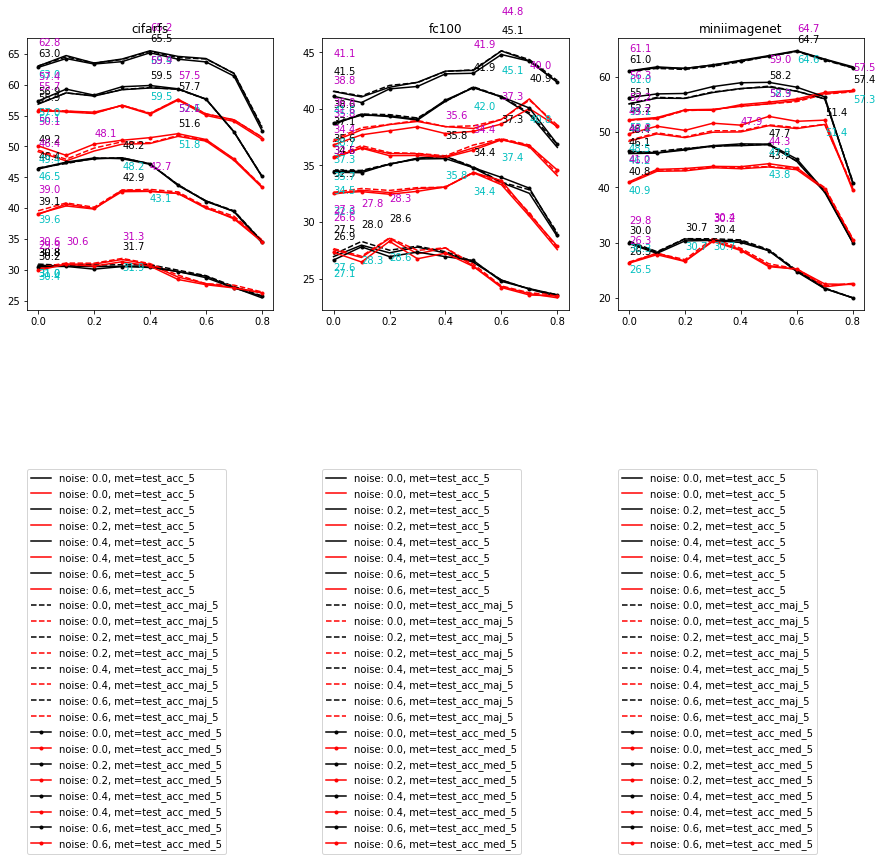

In [6]:
plt.figure(figsize=(5*len(df.D.unique()),5))
for metric, dash, y_shift, text_color in zip(metrics, ['-', '--','.-'], [1.5, -2, 3.5], ('k','c','m')):
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N in sorted(df.N.unique()):
            for V,color in zip(sorted(df.V.unique()), ['k', 'r']):
                cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N][df.V==V].sort_values('R')
                vals = cdf[metric].astype(float)
                plt.plot(cdf.R, vals, dash, label=f'noise: {N}, met={metric}', color=color)
                plt.text(cdf.R.iloc[vals.argmax()], vals.max()+y_shift, f'{vals.max():.1f}', color=text_color)
                plt.text(cdf.R.iloc[0], vals.iloc[0]+y_shift, f'{vals.iloc[0]:.1f}', color=text_color)
        plt.legend(loc=(0,-2))
        plt.title(f'{D}') 

print(list(zip(metrics, ('k','c','m'))))

plt.show()